In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    ! ls
except: ModuleNotFoundError

In [3]:
file_name = 'df_final.csv'
drive_path = '/content/drive/My Drive/1-Master/Projekte und Ideen/fussball/scraper/df_final.csv'

try:
    df_org = pd.read_csv(drive_path, sep=',', index_col=0)
except:
    df_org = pd.read_csv(file_name, sep=',', index_col=0)

In [4]:
df = df_org.copy()

In [5]:
df.weekday = df.weekday.astype(str)
df.day = df.day.astype(str)
df.month = df.month.astype(str)
df.year = df.year.astype(str)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5172 entries, 0 to 5171
Data columns (total 68 columns):
weekday                         5172 non-null object
day                             5172 non-null object
month                           5172 non-null object
year                            5172 non-null object
home_team_break                 5172 non-null object
guest_team_break                5172 non-null object
date                            5172 non-null object
time                            5172 non-null object
home_team_name                  5172 non-null object
guest_team_name                 5172 non-null object
competition                     5172 non-null object
saison                          5172 non-null object
gameday                         5172 non-null object
home_coach                      5172 non-null object
guest_coach                     5172 non-null object
resultNumeric                   5158 non-null float64
homeTotalGoalsShoot             5172 non-nul

In [7]:
df.columns

Index(['weekday', 'day', 'month', 'year', 'home_team_break',
       'guest_team_break', 'date', 'time', 'home_team_name', 'guest_team_name',
       'competition', 'saison', 'gameday', 'home_coach', 'guest_coach',
       'resultNumeric', 'homeTotalGoalsShoot', 'homeTotalGoalsReceived',
       'homeTotalGoalDiff', 'guestTotalGoalsShoot', 'guestTotalGoalsReceived',
       'guestTotalGoalDiff', 'homeTeamGoalsShootAtHome',
       'homeTeamGoalsReceivedAtHome', 'homeTeamGoalsDiffAtHome',
       'homeTeamGoalsShootAway', 'homeTeamGoalsReceivedAway',
       'homeTeamGoalsDiffAway', 'guestTeamGoalsShootAtHome',
       'guestTeamGoalsReceivedAtHome', 'guestTeamGoalsDiffAtHome',
       'guestTeamGoalsShootAway', 'guestTeamGoalsReceivedAway',
       'guestTeamGoalsDiffAway', 'hoamAvgPoints', 'guestAvgpoints', 'htb_0',
       'htb_2', 'htb_3', 'htb_4', 'htb_5', 'htb_6', 'htb_7', 'htb_8', 'htb_9',
       'htb_10', 'htb_11', 'htb_12', 'htb_13', 'htb_14', 'htb_15', 'htb_>15',
       'gtb_0', 'gtb_2', 

In [8]:
df.competition.value_counts()

2. Liga                                1953
Bundesliga                             1878
ÖFB-Cup                                 602
Europa League                           166
Europa League Qualifikation             126
Regionalliga Mitte                      120
Regionalliga West                       120
Regionalliga Ost                        120
UEFA Champions League-Qualifikation      54
Relegation Erste Liga                    16
UEFA Champions League                     6
Relegation Bundesliga                     4
Bundesliga Europa League-Play-off         3
Championship                              2
DFB-Pokal                                 1
EFL Cup                                   1
Name: competition, dtype: int64

In [9]:
df = df[df.home_coach != '?']
df = df[df.guest_coach != '?']

In [10]:
df = df.reset_index(drop=True)
df.head(15)

,weekday,day,month,year,home_team_break,guest_team_break,date,time,home_team_name,guest_team_name,...,gtb_7,gtb_8,gtb_9,gtb_10,gtb_11,gtb_12,gtb_13,gtb_14,gtb_15,gtb_>15
0,1,14,7,2009,0,0,2009-07-14,19:00,FC Gratkorn,First Vienna FC,...,0,0,0,0,0,0,0,0,0,0
1,1,14,7,2009,higher15,higher15,2009-07-14,19:00,FC Wacker Innsbruck,Red Bull Juniors Salzburg,...,0,0,0,0,0,0,0,0,0,1
2,1,14,7,2009,higher15,higher15,2009-07-14,19:00,SC Rheindorf Altach,TSV Hartberg,...,0,0,0,0,0,0,0,0,0,1
3,1,14,7,2009,higher15,higher15,2009-07-14,19:00,SKN St. Pölten,FC Dornbirn,...,0,0,0,0,0,0,0,0,0,1
4,1,14,7,2009,higher15,higher15,2009-07-14,19:00,SC Austria Lustenau,FK Austria Wien Amateure,...,0,0,0,0,0,0,0,0,0,1
5,1,14,7,2009,higher15,higher15,2009-07-14,19:00,FC Admira Wacker Mödling,FC Lustenau,...,0,0,0,0,0,0,0,0,0,1
6,4,17,7,2009,3,3,2009-07-17,18:00,FC Lustenau,FK Austria Wien Amateure,...,0,0,0,0,0,0,0,0,0,0
7,4,17,7,2009,3,3,2009-07-17,18:00,TSV Hartberg,FC Wacker Innsbruck,...,0,0,0,0,0,0,0,0,0,0
8,4,17,7,2009,3,3,2009-07-17,18:00,FC Dornbirn,FC Admira Wacker Mödling,...,0,0,0,0,0,0,0,0,0,0
9,4,17,7,2009,3,3,2009-07-17,18:00,SKN St. Pölten,First Vienna FC,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df.homeTotalGoalsShoot.tail()

3852    1.347368
3853    1.376344
3854    1.335385
3855    2.256410
3856    1.539648
Name: homeTotalGoalsShoot, dtype: float64

In [12]:
df.homeTotalGoalsShoot.tail()

3852    1.347368
3853    1.376344
3854    1.335385
3855    2.256410
3856    1.539648
Name: homeTotalGoalsShoot, dtype: float64

In [13]:
weight_cols = ['homeTotalGoalsShoot', 'homeTotalGoalsReceived',
       'homeTotalGoalDiff', 'guestTotalGoalsShoot', 'guestTotalGoalsReceived',
       'guestTotalGoalDiff', 'homeTeamGoalsShootAtHome',
       'homeTeamGoalsReceivedAtHome', 'homeTeamGoalsDiffAtHome',
       'homeTeamGoalsShootAway', 'homeTeamGoalsReceivedAway',
       'homeTeamGoalsDiffAway', 'guestTeamGoalsShootAtHome',
       'guestTeamGoalsReceivedAtHome', 'guestTeamGoalsDiffAtHome',
       'guestTeamGoalsShootAway', 'guestTeamGoalsReceivedAway',
       'guestTeamGoalsDiffAway', 'hoamAvgPoints', 'guestAvgpoints']

In [14]:
df_weights = pd.DataFrame()
weights = [0.1, 0.3, 0.5, 0.7, 0.9]

for weight_index in weights:
    weight = weight_index

    for col in weight_cols:

        b = np.multiply(
        np.divide(
            df[col].groupby(df.home_team_name).cumsum(),
            df[col].groupby(df.home_team_name).cumcount()), weight).replace([np.inf, -np.inf], np.nan).fillna(0)

        col_name = col + '_' + str(int(weight*100))
        df_weights[col_name] = np.multiply(df[col], 1-weight) + b

df_weights.tail()

C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


,homeTotalGoalsShoot_10,homeTotalGoalsReceived_10,homeTotalGoalDiff_10,guestTotalGoalsShoot_10,guestTotalGoalsReceived_10,guestTotalGoalDiff_10,homeTeamGoalsShootAtHome_10,homeTeamGoalsReceivedAtHome_10,homeTeamGoalsDiffAtHome_10,homeTeamGoalsShootAway_10,...,homeTeamGoalsReceivedAway_90,homeTeamGoalsDiffAway_90,guestTeamGoalsShootAtHome_90,guestTeamGoalsReceivedAtHome_90,guestTeamGoalsDiffAtHome_90,guestTeamGoalsShootAway_90,guestTeamGoalsReceivedAway_90,guestTeamGoalsDiffAway_90,hoamAvgPoints_90,guestAvgpoints_90
3852,1.373576,0.604324,0.769252,1.619741,1.228453,0.391288,1.398680,1.253836,0.144844,1.341203,...,1.575405,0.100869,1.773005,1.134984,0.638021,1.538657,1.375116,0.163541,1.402505,1.609284
3853,1.370138,0.759517,0.610621,1.334711,1.563890,-0.229180,1.580360,1.522906,0.057454,1.161213,...,1.980645,-0.891434,1.594395,1.527690,0.066705,1.445201,1.609880,-0.164679,1.138895,1.360206
3854,1.322075,0.769499,0.552576,1.755701,1.275288,0.480413,1.314367,1.630811,-0.316444,1.328273,...,1.996886,-0.755878,1.721774,1.252252,0.469522,1.499060,1.476012,0.023048,1.124128,1.521696
3855,2.229711,0.358335,1.871376,1.521244,1.501840,0.019403,2.434240,0.766866,1.667374,2.049990,...,1.046749,0.770860,1.682676,1.216835,0.465841,1.454773,1.478761,-0.023988,1.988753,1.502647
3856,1.540398,0.550029,0.990369,1.785523,1.392154,0.393368,1.616502,1.151273,0.465229,1.470699,...,1.142513,0.346941,1.800208,1.135598,0.664609,1.542183,1.493599,0.048584,1.647993,1.581103


In [15]:
df_weights.head()

,homeTotalGoalsShoot_10,homeTotalGoalsReceived_10,homeTotalGoalDiff_10,guestTotalGoalsShoot_10,guestTotalGoalsReceived_10,guestTotalGoalDiff_10,homeTeamGoalsShootAtHome_10,homeTeamGoalsReceivedAtHome_10,homeTeamGoalsDiffAtHome_10,homeTeamGoalsShootAway_10,...,homeTeamGoalsReceivedAway_90,homeTeamGoalsDiffAway_90,guestTeamGoalsShootAtHome_90,guestTeamGoalsReceivedAtHome_90,guestTeamGoalsDiffAtHome_90,guestTeamGoalsShootAway_90,guestTeamGoalsReceivedAway_90,guestTeamGoalsDiffAway_90,hoamAvgPoints_90,guestAvgpoints_90
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df = pd.concat([df, df_weights], axis='columns')

In [17]:
ndf = df.shape[0]
df.shape

(3857, 168)

In [18]:
ndf

3857

In [19]:
df = df.drop(['date'], axis=1)

In [20]:
# df = df.select_dtypes(exclude=object)

In [21]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [23]:
categorial_variables = df.columns[:14]
# categorial_variables = categorial_variables.drop(['viewers', 'home_game_system', 'guest_game_system'], axis=1)
categorial_variables

Index(['weekday', 'day', 'month', 'year', 'home_team_break',
       'guest_team_break', 'time', 'home_team_name', 'guest_team_name',
       'competition', 'saison', 'gameday', 'home_coach', 'guest_coach'],
      dtype='object')

In [24]:
df_cat = pd.get_dummies(df[categorial_variables])
df = pd.concat([df, df_cat], axis=1)
df = df.drop(categorial_variables, axis=1)
# df = df.drop(['home_team_break', 'guest_team_break'], axis=1)

In [25]:
df.shape

(3857, 746)

In [26]:
df.head()

,resultNumeric,homeTotalGoalsShoot,homeTotalGoalsReceived,homeTotalGoalDiff,guestTotalGoalsShoot,guestTotalGoalsReceived,guestTotalGoalDiff,homeTeamGoalsShootAtHome,homeTeamGoalsReceivedAtHome,homeTeamGoalsDiffAtHome,...,guest_coach_Walter Kogler,guest_coach_Walter Schachner,guest_coach_Werner Grabherr,guest_coach_Werner Gregoritsch,guest_coach_Werner Ofner,guest_coach_Wilhelm Schuldes,guest_coach_Wilhelm Wahlmüller,guest_coach_Wolfgang Luisser,guest_coach_Zoran Barisic,guest_coach_Óscar García
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3857 entries, 0 to 3856
Columns: 746 entries, resultNumeric to guest_coach_Óscar García
dtypes: float64(121), int64(32), uint8(593)
memory usage: 6.7 MB


In [28]:
df.columns

Index(['resultNumeric', 'homeTotalGoalsShoot', 'homeTotalGoalsReceived',
       'homeTotalGoalDiff', 'guestTotalGoalsShoot', 'guestTotalGoalsReceived',
       'guestTotalGoalDiff', 'homeTeamGoalsShootAtHome',
       'homeTeamGoalsReceivedAtHome', 'homeTeamGoalsDiffAtHome',
       ...
       'guest_coach_Walter Kogler', 'guest_coach_Walter Schachner',
       'guest_coach_Werner Grabherr', 'guest_coach_Werner Gregoritsch',
       'guest_coach_Werner Ofner', 'guest_coach_Wilhelm Schuldes',
       'guest_coach_Wilhelm Wahlmüller', 'guest_coach_Wolfgang Luisser',
       'guest_coach_Zoran Barisic', 'guest_coach_Óscar García'],
      dtype='object', length=746)

In [29]:
df.resultNumeric.head()

0    0.0
1    1.0
2    4.0
3    2.0
4    1.0
Name: resultNumeric, dtype: float64

In [30]:
df.resultNumeric.tail()

3852   NaN
3853   NaN
3854   NaN
3855   NaN
3856   NaN
Name: resultNumeric, dtype: float64

In [31]:
df_pred = df[pd.isnull(df).any(axis=1)]
df = df.dropna()
y = df.resultNumeric
df = df.drop(['resultNumeric'], axis=1)
df_pred = df_pred.drop('resultNumeric', axis=1)

In [32]:
df_pred.head()

,homeTotalGoalsShoot,homeTotalGoalsReceived,homeTotalGoalDiff,guestTotalGoalsShoot,guestTotalGoalsReceived,guestTotalGoalDiff,homeTeamGoalsShootAtHome,homeTeamGoalsReceivedAtHome,homeTeamGoalsDiffAtHome,homeTeamGoalsShootAway,...,guest_coach_Walter Kogler,guest_coach_Walter Schachner,guest_coach_Werner Grabherr,guest_coach_Werner Gregoritsch,guest_coach_Werner Ofner,guest_coach_Wilhelm Schuldes,guest_coach_Wilhelm Wahlmüller,guest_coach_Wolfgang Luisser,guest_coach_Zoran Barisic,guest_coach_Óscar García
3843,1.529412,1.264706,0.264706,1.260870,1.586957,-0.326087,1.764706,2.529412,-0.764706,1.294118,...,0,0,0,0,0,0,0,0,0,0
3844,1.771429,0.742857,1.028571,1.598985,1.269036,0.329949,2.294118,1.529412,0.764706,1.277778,...,0,0,0,0,0,0,0,0,0,0
3845,1.413265,0.568878,0.844388,1.454545,1.563636,-0.109091,1.351064,1.186170,0.164894,1.470588,...,0,0,0,0,0,0,0,0,0,0
3846,1.120603,0.763819,0.356784,1.936000,1.344000,0.592000,1.032967,1.670330,-0.637363,1.194444,...,0,0,0,0,0,0,0,0,0,0
3847,1.479714,0.553699,0.926014,1.750000,1.375000,0.375000,1.630542,1.142857,0.487685,1.337963,...,0,0,0,0,0,0,0,0,0,0


In [33]:
X = df.copy()

In [34]:
# X = X.drop(['homeTotalGoalsShoot', 'homeTotalGoalsReceived',
#        'guestTotalGoalsShoot', 'guestTotalGoalsReceived',
#        'homeTeamGoalsShootAtHome', 'homeTeamGoalsReceivedAtHome',
#        'homeTeamGoalsShootAway',
#        'homeTeamGoalsReceivedAway',
#        'guestTeamGoalsShootAtHome', 'guestTeamGoalsReceivedAtHome',
#        'guestTeamGoalsShootAway',
#        'guestTeamGoalsReceivedAway', 'hoamAvgPoints',
#        'guestAvgpoints'], axis=1)

In [35]:
X.shape, y.shape

((3843, 745), (3843,))

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [38]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, MaxAbsScaler

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.svm import SVR

import warnings

In [39]:
X_train.columns

Index(['homeTotalGoalsShoot', 'homeTotalGoalsReceived', 'homeTotalGoalDiff',
       'guestTotalGoalsShoot', 'guestTotalGoalsReceived', 'guestTotalGoalDiff',
       'homeTeamGoalsShootAtHome', 'homeTeamGoalsReceivedAtHome',
       'homeTeamGoalsDiffAtHome', 'homeTeamGoalsShootAway',
       ...
       'guest_coach_Walter Kogler', 'guest_coach_Walter Schachner',
       'guest_coach_Werner Grabherr', 'guest_coach_Werner Gregoritsch',
       'guest_coach_Werner Ofner', 'guest_coach_Wilhelm Schuldes',
       'guest_coach_Wilhelm Wahlmüller', 'guest_coach_Wolfgang Luisser',
       'guest_coach_Zoran Barisic', 'guest_coach_Óscar García'],
      dtype='object', length=745)

In [40]:
rob_scale_X = RobustScaler()
rob_scale_X.fit(X_train)
X_train_scaled = rob_scale_X.transform(X_train)
X_test_scaled = rob_scale_X.transform(X_test)

rob_scale_y = RobustScaler()
rob_scale_y.fit(y_train.values.reshape(-1,1))
y_train_scaled = rob_scale_y.transform(y_train.values.reshape(-1,1))
y_test_scaled = rob_scale_y.transform(y_test.values.reshape(-1,1))

In [41]:
warnings.filterwarnings('ignore')

In [42]:
#Validation function
n_folds = 3

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [71]:
rfr = RandomForestRegressor(n_estimators=10, max_depth=4, criterion='mse')

score = rmsle_cv(rfr)
print("\nRF score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


RF score: 1.8445 (0.0185)



In [72]:
val(rfr)

0.6293 0.3707 1.0
   pred_test  actual_test  calc_test
0   0.811345          0.0   0.000000
1   0.444551          2.0   0.889102
2  -1.328147         -5.0   6.640735
3   0.830955          2.0   1.661910
4   1.068449          2.0   2.136899

 0.6692 0.3308 1.0
   pred_train  actual_train  calc_train
0   -0.092851          -4.0    0.371405
1    0.892209           0.0    0.000000
2    0.067614          -2.0   -0.135228
3   -0.077589          -2.0    0.155178
4    0.840840           0.0    0.000000


In [73]:
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [74]:
rfr.predict(df_pred)

array([ 0.23493985,  0.00919251,  0.60157089, -0.37444854,  0.25804094,
        0.33960775,  0.15925921,  0.27738474,  0.05273556, -0.35364025,
        0.29471291, -0.13737709,  2.13417622,  0.15671714])

In [75]:
asdf = pd.DataFrame()

asdf['date'] = df_org.date[pd.isnull(df_org).any(axis=1)].values
asdf['home'] = df_org.home_team_name[pd.isnull(df_org).any(axis=1)].values
asdf['guest'] = df_org.guest_team_name[pd.isnull(df_org).any(axis=1)].values

asdf['rfr'] = rfr.predict(df_pred)



,0,home,guest,date
0,0.234940,Young Violets Austria Wien,SV Lafnitz,2019-08-23
1,0.009193,FC Juniors OÖ,SC Austria Lustenau,2019-08-23
2,0.601571,FC Wacker Innsbruck,SKU Amstetten,2019-08-23
3,-0.374449,Floridsdorfer AC,FC Liefering,2019-08-23
4,0.258041,SV Ried,Grazer AK 1902,2019-08-23
5,0.339608,SV Horn,SK Vorwärts Steyr,2019-08-23
6,0.159259,FC Dornbirn,SV Kapfenberg,2019-08-24
7,0.277385,SV Mattersburg,SKN St. Pölten,2019-08-24
8,0.052736,SK Rapid Wien,LASK,2019-08-24
9,-0.353640,Wolfsberger AC,SC Rheindorf Altach,2019-08-24


In [50]:
rfr.predict(df_pred)

array([ 0.07919778, -0.01032806,  0.50526813, -0.05930147,  0.38754835,
        0.619839  , -0.29928019,  0.1477971 ,  0.3330161 ,  0.04919066,
        0.45625149, -0.10142682,  2.2846443 ,  0.56792329])

In [56]:
df_org.home_team_name[pd.isnull(df_org).any(axis=1)]

5158    Young Violets Austria Wien
5159                 FC Juniors OÖ
5160           FC Wacker Innsbruck
5161              Floridsdorfer AC
5162                       SV Ried
5163                       SV Horn
5164                   FC Dornbirn
5165                SV Mattersburg
5166                 SK Rapid Wien
5167                Wolfsberger AC
5168         SK Austria Klagenfurt
5169                  TSV Hartberg
5170             Red Bull Salzburg
5171                 SK Sturm Graz
Name: home_team_name, dtype: object

In [296]:
# alphas_lasso = [0.005, 0.006, 0.007, 0.008, 0.016]
# for alpha in alphas_lasso:

lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.006, random_state=123))

score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 1.8383 (0.0697)



In [76]:
lasso = Lasso(alpha = 0.006, random_state=123)
lasso.fit(X_train_scaled, y_train_scaled)

Lasso(alpha=0.006, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False)

In [77]:
val(lasso)

0.6429 0.3571 1.0
   pred_test  actual_test  calc_test
0   1.075451          0.0   0.000000
1   0.577643          2.0   1.155286
2  -1.602560         -5.0   8.012801
3   0.886789          2.0   1.773578
4   1.062995          2.0   2.125991

 0.6818 0.3182 1.0
   pred_train  actual_train  calc_train
0   -0.597965          -4.0    2.391860
1    0.527492           0.0    0.000000
2    0.395240          -2.0   -0.790480
3   -0.732564          -2.0    1.465129
4    0.587674           0.0    0.000000


In [78]:
lasso.predict(df_pred)

array([-0.18351217, -0.15558261,  0.23589066, -0.4829477 ,  0.28525673,
        0.40488454, -0.75354506,  0.41447765,  0.76695215,  0.07007257,
        0.30783248, -0.71974163,  2.30050904,  0.42181787])

In [79]:
# alphas_ridge = [120, 130, 140]
# for alpha in alphas_ridge:

ridge = make_pipeline(RobustScaler(), Ridge(alpha = 120, random_state=123))

score = rmsle_cv(ridge)
print("\Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

\Ridge score: 1.8316 (0.0208)



In [80]:
val(ridge)

0.6599 0.3401 1.0
   pred_test  actual_test  calc_test
0   1.079684          0.0   0.000000
1   0.684382          2.0   1.368763
2  -1.369591         -5.0   6.847954
3   1.062064          2.0   2.124128
4   0.900098          2.0   1.800197

 0.6875 0.3125 1.0
   pred_train  actual_train  calc_train
0   -0.558742          -4.0    2.234969
1    0.365062           0.0    0.000000
2    0.527930          -2.0   -1.055860
3   -0.989104          -2.0    1.978207
4    0.592339           0.0    0.000000


In [81]:
ridge.predict(df_pred)

array([-0.3868458 , -0.07818449,  0.29055984, -0.27490673,  0.41148666,
        0.78069851, -1.0668015 ,  0.52741053,  0.52880088,  0.01673474,
        0.64887787, -0.41273202,  2.08160213,  0.49464807])

In [82]:
ridge.predict(df_pred)

array([-0.3868458 , -0.07818449,  0.29055984, -0.27490673,  0.41148666,
        0.78069851, -1.0668015 ,  0.52741053,  0.52880088,  0.01673474,
        0.64887787, -0.41273202,  2.08160213,  0.49464807])

In [83]:
# alphas_elastic = [0.007, 0.008]
# l1_ratios_elastic = [0, 0.1, 0.2]

# for alpha in range(len(alphas_elastic)):
#     for l1 in range(len(l1_ratios_elastic)):

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.008, l1_ratio=0, random_state=123))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 1.8373 (0.0222)



In [91]:
ENet.fit(X_train_scaled, y_train_scaled)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('elasticnet',
                 ElasticNet(alpha=0.008, copy_X=True, fit_intercept=True,
                            l1_ratio=0, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=123,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)

In [84]:
gbr = make_pipeline(RobustScaler(), GradientBoostingRegressor(
    n_estimators=500, learning_rate=0.05,
    max_depth=4, max_features='sqrt',
    min_samples_leaf=15, min_samples_split=10,
    loss='huber', random_state = 123))


score = rmsle_cv(gbr)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 1.8505 (0.0052)



In [85]:
gbr.fit(X_train_scaled, y_train_scaled)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse',
                                           init=None, learning_rate=0.05,
                                           loss='huber', max_depth=4,
                                           max_features='sqrt',
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=15,
                                           min_samples_split=10,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=500,
    

In [329]:
gbr.predict(df_pred)

array([0.73015448, 0.1596881 , 0.16575907, 0.24398635, 0.27642423,
       0.37011353])

In [176]:
val(gbr)

0.6693 0.3307 1.0
   pred_test  actual_test  calc_test
0  -0.001512          0.0  -0.000000
1  -1.174120          0.0  -0.000000
2  -0.421113         -1.0   0.421113
3  -1.884412         -3.0   5.653236
4  -0.959806          0.0  -0.000000

 0.8049 0.1951 1.0
   pred_train  actual_train  calc_train
0    0.635611           2.0    1.271223
1   -2.304666          -4.0    9.218665
2   -1.328504          -4.0    5.314017
3    0.515679          -2.0   -1.031357
4   -0.226988           3.0   -0.680963


In [86]:
xgboost = make_pipeline(RobustScaler(), XGBRegressor(learning_rate=0.01,n_estimators=500,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:squarederror', nthread=-1,
                                     scale_pos_weight=1, seed=123,
                                     reg_alpha=0.00006))

score = rmsle_cv(xgboost)
print("Xgboost 2 score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost 2 score: 1.8245 (0.0102)



In [87]:
xgboost.fit(X_train_scaled, y_train_scaled)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.7, gamma=0,
                              importance_type='gain', learning_rate=0.01,
                              max_delta_step=0, max_depth=3, min_child_weight=0,
                              missing=None, n_estimators=500, n_jobs=1,
                              nthread=-1, objective='reg:squarederror',
                              random_state=0, reg_alpha=6e-05, reg_lambda=1,
                              scale_pos_weight=1, seed=123, silent=None,
                              subsample=0.7, verbosity=1))],
         verbose=False)

In [88]:
xgboost.predict(df_pred)

array([0.27716342, 0.31714714, 0.32008708, 0.29443753, 0.39888334,
       0.3454861 , 0.09297672, 0.33489317, 0.4025205 , 0.3357346 ,
       0.33035207, 0.15353507, 0.58888024, 0.3956034 ], dtype=float32)

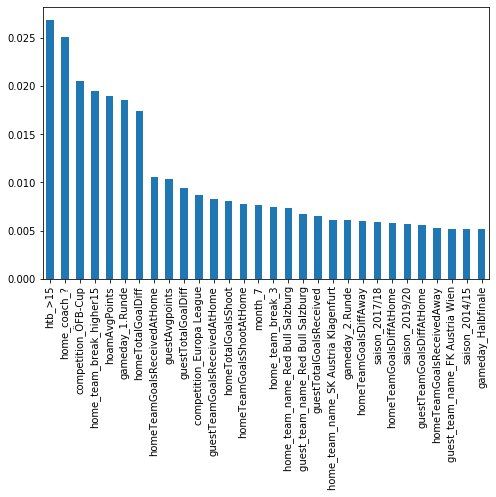

In [331]:
feat_imp = pd.Series(xgboost.feature_importances_, index=X_train.columns)
plt.figure(figsize=(8,5))
feat_imp.nlargest(30).plot(kind='bar')

In [45]:
def val(model):
    model.fit(X_train, y_train)
    model_name = 'test'
    model_name = pd.DataFrame()
    model_name['pred_test'] = model.predict(X_test)
    model_name['actual_test'] = y_test.values
    model_name['calc_test'] = model_name['pred_test'] * model_name['actual_test']
    score_test = model_name['calc_test'][model_name['calc_test'] > 0].count() / (len(model_name['calc_test']) - model_name['calc_test'][model_name['calc_test'] == 0].count())
    neg_score_test = model_name['calc_test'][model_name['calc_test'] < 0].count() / (len(model_name['calc_test']) - model_name['calc_test'][model_name['calc_test'] == 0].count())
    
    print(round(score_test,4), round(neg_score_test,4), (score_test+neg_score_test))
    print(model_name.head())
    
    model_name = 'train'
    model_name = pd.DataFrame()
    model_name['pred_train'] = model.predict(X_train)
    model_name['actual_train'] = y_train.values
    model_name['calc_train'] = model_name['pred_train'] * model_name['actual_train']
    score_train = model_name['calc_train'][model_name['calc_train'] > 0].count() / (len(model_name['calc_train']) - model_name['calc_train'][model_name['calc_train'] == 0].count())
    neg_score_train = model_name['calc_train'][model_name['calc_train'] < 0].count() / (len(model_name['calc_train']) - model_name['calc_train'][model_name['calc_train'] == 0].count())

    print('\n', round(score_train,4), round(neg_score_train,4), (score_train+neg_score_train))
    print(model_name.head())   

In [175]:
val(rfr)

0.6824 0.3176 1.0
   pred_test  actual_test  calc_test
0   0.364810          0.0   0.000000
1  -0.582537          0.0  -0.000000
2  -0.473419         -1.0   0.473419
3  -2.213989         -3.0   6.641966
4  -0.315344          0.0  -0.000000

 0.6757 0.3243 1.0
   pred_train  actual_train  calc_train
0    0.269778           2.0    0.539557
1   -0.599961          -4.0    2.399844
2   -0.491861          -4.0    1.967445
3    0.577365          -2.0   -1.154730
4    0.225162           3.0    0.675486


In [247]:
val(xgboost)

0.6731 0.3269 1.0
   pred_test  actual_test  calc_test
0   0.894339          1.0   0.894339
1  -0.071337          0.0  -0.000000
2   0.271314         -3.0  -0.813941
3   0.099478         -3.0  -0.298435
4   0.691256          0.0   0.000000

 0.695 0.305 1.0
   pred_train  actual_train  calc_train
0   -0.174078          -2.0    0.348155
1   -0.346250           2.0   -0.692499
2    0.352688          -1.0   -0.352688
3    0.505679           1.0    0.505679
4   -0.421043           0.0   -0.000000


In [248]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rfr, random_state=123).fit(X_test, y_test)

In [249]:
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=None )

Weight,Feature
0.0441 ± 0.0123,hoamAvgPoints
0.0325 ± 0.0480,homeTeamGoalsReceivedAtHome
0.0262 ± 0.0056,competition_ÖFB-Cup
0.0219 ± 0.0250,homeTeamGoalsReceivedAway
0.0206 ± 0.0159,homeTeamGoalsShootAway
0.0170 ± 0.0406,guestTeamGoalsReceivedAtHome
0.0162 ± 0.0101,homeTotalGoalDiff
0.0159 ± 0.0150,guestTotalGoalDiff
0.0122 ± 0.0206,guestTotalGoalsShoot
0.0111 ± 0.0088,weekday_4


In [93]:
from sklearn.linear_model import SGDRegressor

In [94]:
sgdr = SGDRegressor()

In [95]:
sgdr.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [96]:
sgdr.score(X_train, y_train)

0.16648184676745292

In [97]:
sgdr.score(X_test, y_test)

-0.02360751486303836

In [255]:
val(sgdr)

0.6646 0.3354 1.0
   pred_test  actual_test  calc_test
0   0.895990          1.0   0.895990
1   0.283339          0.0   0.000000
2   0.308216         -3.0  -0.924648
3   0.559772         -3.0  -1.679317
4   0.684609          0.0   0.000000

 0.706 0.294 1.0
   pred_train  actual_train  calc_train
0   -0.490536          -2.0    0.981073
1    0.079686           2.0    0.159373
2    0.238404          -1.0   -0.238404
3    1.042896           1.0    1.042896
4   -0.841056           0.0   -0.000000


In [98]:
svr = SVR()
svr.fit(X_train_scaled, y_train_scaled)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [99]:
svr.score(X_test_scaled, y_test_scaled)

0.07310889852494051

In [36]:
val(svr)

0.581 0.419 1.0
   pred_test  actual_test  calc_test
0   0.588523         -3.0  -1.765569
1   0.068594         -2.0  -0.137187
2   0.202703          0.0   0.000000
3   1.307293          4.0   5.229172
4  -0.197102          0.0  -0.000000


KeyboardInterrupt: 

In [37]:
xgboost.predict(X_test)

NameError: name 'xgboost' is not defined

In [102]:
pred_frame = pd.DataFrame()

pred_frame['date'] = df_org.date[pd.isnull(df_org).any(axis=1)].values
pred_frame['home'] = df_org.home_team_name[pd.isnull(df_org).any(axis=1)].values
pred_frame['guest'] = df_org.guest_team_name[pd.isnull(df_org).any(axis=1)].values

pred_frame['rf'] = rfr.predict(df_pred)
pred_frame['lasso'] = lasso.predict(df_pred)
pred_frame['ridge'] = ridge.predict(df_pred)
pred_frame['elastic'] = ENet.predict(df_pred)
pred_frame['gbr'] = gbr.predict(df_pred)
pred_frame['xgb'] = xgboost.predict(df_pred)
pred_frame['sgdr'] = sgdr.predict(df_pred)
pred_frame

,date,home,guest,rf,lasso,ridge,elastic,gbr,xgb,sgdr
0,2019-08-23,Young Violets Austria Wien,SV Lafnitz,0.234940,-0.183512,-0.386846,-0.133007,0.370191,0.277163,-1.285733
1,2019-08-23,FC Juniors OÖ,SC Austria Lustenau,0.009193,-0.155583,-0.078184,0.025775,0.220155,0.317147,-1.010619
2,2019-08-23,FC Wacker Innsbruck,SKU Amstetten,0.601571,0.235891,0.290560,0.033611,0.061088,0.320087,-0.585298
3,2019-08-23,Floridsdorfer AC,FC Liefering,-0.374449,-0.482948,-0.274907,0.019696,0.181660,0.294438,-0.731286
4,2019-08-23,SV Ried,Grazer AK 1902,0.258041,0.285257,0.411487,0.322366,0.292272,0.398883,0.086310
5,2019-08-23,SV Horn,SK Vorwärts Steyr,0.339608,0.404885,0.780699,0.274608,0.452169,0.345486,-0.030130
6,2019-08-24,FC Dornbirn,SV Kapfenberg,0.159259,-0.753545,-1.066802,-0.392383,-0.010527,0.092977,-1.792188
7,2019-08-24,SV Mattersburg,SKN St. Pölten,0.277385,0.414478,0.527411,0.252381,0.225638,0.334893,-0.103793
8,2019-08-24,SK Rapid Wien,LASK,0.052736,0.766952,0.528801,0.363110,0.257419,0.402521,0.174336
9,2019-08-24,Wolfsberger AC,SC Rheindorf Altach,-0.353640,0.070073,0.016735,0.102493,0.349700,0.335735,-0.471644
